In [1]:
import dLux
import poppy
import jax

In [2]:
from jax.config import config

In [3]:
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)

In [4]:
from layers import *
from matplotlib import pyplot

In [5]:
hexagonal_basis = HexagonalBasis(
    nterms=9, 
    npix=256,
    rmax=1., 
    theta=0., 
    phi=0., 
    x=0., 
    y=0.)

In [6]:
coordinates = 2 / 256 * get_pixel_positions(256)

In [7]:
rho = cartesian_to_polar(coordinates)[0]

In [8]:
n = 1
m = 1
upper = ((np.abs(n) - np.abs(m)) / 2).astype(int) + 1

In [9]:
r = hexagonal_basis._radial_zernike(n, m, upper, rho)

In [10]:
pr = poppy.zernike.R(n, m, rho)

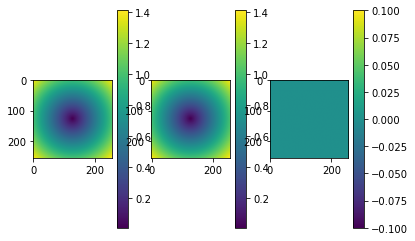

In [11]:
pyplot.subplot(1, 3, 1)
pyplot.imshow(r)
pyplot.colorbar()
pyplot.subplot(1, 3, 2)
pyplot.imshow(pr)
pyplot.colorbar()
pyplot.subplot(1, 3, 3)
pyplot.imshow(pr - r)
pyplot.colorbar()

In [14]:
zernikes = hexagonal_basis._zernikes(coordinates)

In [15]:
aperture = (rho <= 1.).astype(int)

In [16]:
normalisation_coefficients = \
    (1 + (np.sqrt(2) - 1) * (m != 0)) *\
    np.sqrt(n + 1)

In [17]:
phase_mod = (m < 0) * np.pi / 2

In [18]:
theta = cartesian_to_polar(coordinates)[1]

In [19]:
phase = np.cos(np.abs(m) * theta - phase_mod)

In [20]:
zernike = phase * aperture * r * normalisation_coefficients

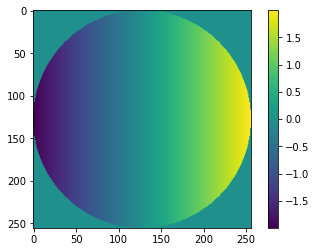

In [21]:
pyplot.imshow(zernike)
pyplot.colorbar()

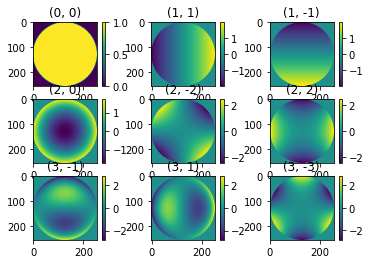

In [22]:
for i in range(9):
    n, m = hexagonal_basis._noll_index(np.array([i + 1]))
    pyplot.subplot(3, 3, i + 1)
    pyplot.title(f"{int(n), int(m)}")
    pyplot.imshow(zernikes[i])
    pyplot.colorbar()

In [6]:
p_zernikes = poppy.zernike.zernike_basis(9, 256, outside=0.)

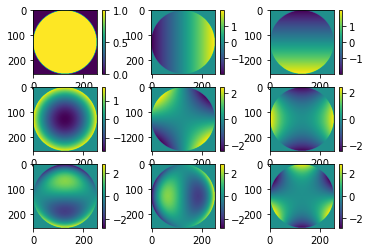

In [7]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_zernikes[i])
    pyplot.colorbar()

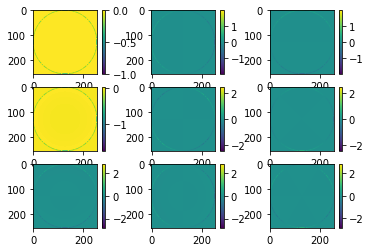

In [8]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_zernikes[i] - zernikes[i])
    pyplot.colorbar()